# Použití datasetů v knihovně torchvision

- [Torchvision](https://pytorch.org/vision/stable/index.html) je doprovodná knihovna k PyTorchi obsahující podporu pro práci s obrazovými daty.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import torch
import torchvision

- Součástí Torchvision je submodul `datasets` implementující podporu pro nejznámější datasety a pro načítání dat z disku.
- Velkou část předmětu budeme používat dataset [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), který implementuje třída `torchvision.datasets.CIFAR10`.
- Dataset není potřeba stahovat ručně. Vše zařídí implementace v Torchvision skrze parametry `download=True` a `root=..'../data'` (kam se mají data uložit).

In [2]:
# Vsimneme si `train=True`
train_dataset = torchvision.datasets.CIFAR10(root='../data', train=True, download=True)
train_dataset

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data
    Split: Train

In [3]:
# Vsimneme si `train=False`
val_dataset = torchvision.datasets.CIFAR10(root='../data', train=False, download=True)
val_dataset

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../data
    Split: Test

In [4]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

- Torchvision datasety se chovají jako `list`.
- Lze se tedy ptát na *n*-tý prvek hranatými závorkami.

In [5]:
train_dataset[5]

(<PIL.Image.Image image mode=RGB size=32x32>, 1)

- Jak vidíme, 6. prvek datasetu je *dvojice* (`tuple`) sestávající z obrázku a jeho indexu třídy (label, target).
- Obrázek je defaultně navrácen jako typ `Image` knihovny Pillow (Python Imaging Library, PIL).
- Target je číslo typu `int` označující jednu ze tříd v atributu `.classes`.
- Všechny obrázky CIFAR-10 datasetu jsou uloženy v atributu `.data`, což je 4D `numpy.ndarray` typu `np.uint8`. První dimenze odpovídá jednotlivým obrázkům, další pak řádkům, sloupcům a kanálům (RGB).

In [6]:
type(train_dataset.data), train_dataset.data.shape, train_dataset.data.dtype, train_dataset.data.min(), train_dataset.data.max()

(numpy.ndarray, (50000, 32, 32, 3), dtype('uint8'), 0, 255)

- Podobně všechny targety jsou uložny v `.targets`, což je `list` o délce počtu obrázků, přičemž každý target číslo typu `int` v rozmezí 0-9, kde 0 značí letadlo (airplane), 1 značí automobil (automobile) atd.

In [7]:
type(train_dataset.targets), len(train_dataset.targets), type(train_dataset.targets[0]), min(train_dataset.targets), max(train_dataset.targets)

(list, 50000, int, 0, 9)

- Pro lepší představu si vykreslíme sloupec 10 obrázků pro každou z 10 tříd.

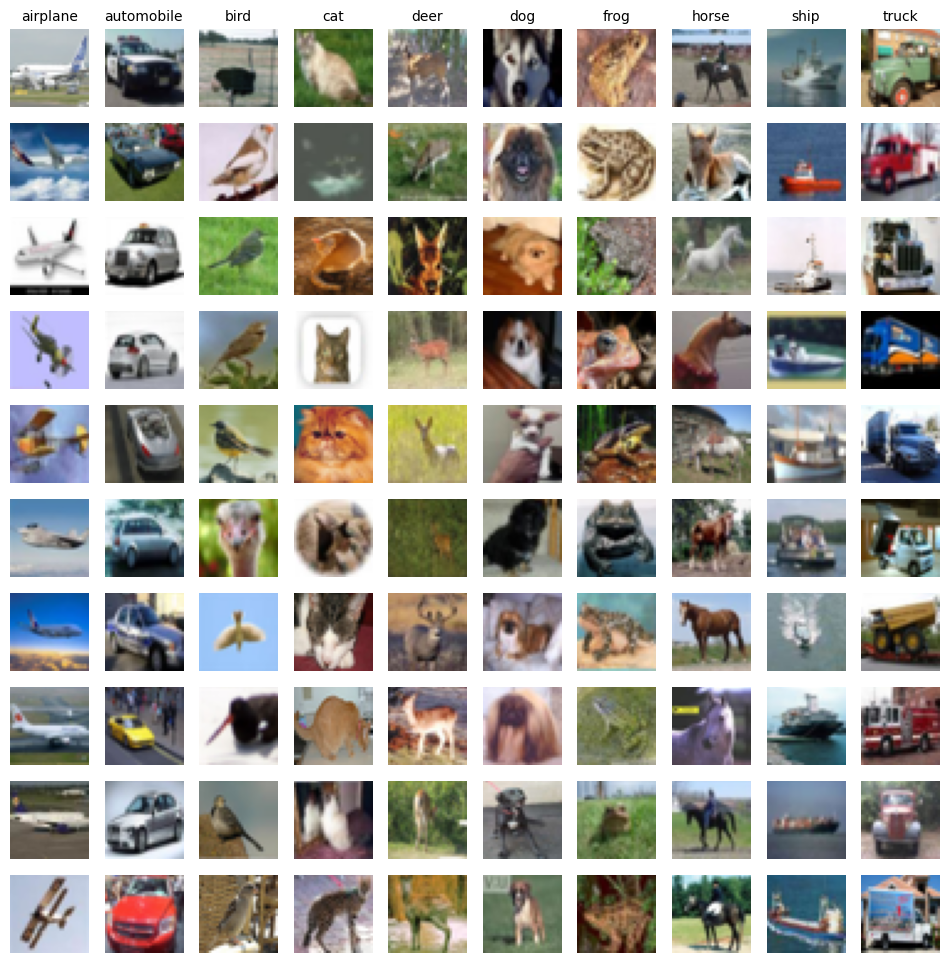

In [8]:
# vykresli 10x10 obrazku, poradi je po radcich, ovsem my budeme vykreslovat po sloupcich,
# tj. kazdy sloupec bude obsahovat 10 prikladu jedne ze trid
fig, axes = plt.subplots(10, 10, figsize=(12, 12))

for i, cls in enumerate(train_dataset.classes):
    # chceme pouze obrazky aktualni tridy a z nich nahodne vybereme 10
    cls_ids = [j for j, y in enumerate(train_dataset.targets) if y == i]
    draw_ids = np.random.choice(cls_ids, size=10)
    
    # pyplot podobne jako MATLAB nabizi funkci subplot pro vykresleni vice grafu do jednoho okna
    for j, k in enumerate(draw_ids):
        # vyresli obrazek
        axes[j, i].imshow(train_dataset.data[k])
        
        # nevykresluj popisky os
        axes[j, i].axis('off')
        
        # v prvnim radku pridame nazev grafu (obrazku)
        if j == 0:
            axes[j, i].set_title(cls, fontsize=10)

# Preprocessing

- Torchvision podporuje různé druhy předzpracování a augmentace obrazu.
- Knihovna implementuje různé druhy preprocessingu a augmentace v submodulu `transforms`.
- Nejjednodušší je pouhá konverze z `PIL.Image` nebo Numpy do typu `torch.Tensor`, kterou provádí `torchvision.transforms.ToTensor`.

In [9]:
transform = torchvision.transforms.ToTensor()
transform

ToTensor()

- Neupravená data pro referenci jsou opět dvojice `(PIL.Image, int)`.

In [10]:
x, y = train_dataset[5]
x, y

(<PIL.Image.Image image mode=RGB size=32x32>, 1)

- `torchvision.transforms.ToTensor` umí obrázek převést na `torch.Tensor` tvaru CHW a pixely s hodnotami 0..1.

In [11]:
transform(x)

tensor([[[0.6235, 0.5882, 0.6000,  ..., 0.3569, 0.2902, 0.2980],
         [0.5569, 0.5725, 0.6078,  ..., 0.4980, 0.4784, 0.3373],
         [0.4275, 0.3882, 0.4118,  ..., 0.5373, 0.6392, 0.3647],
         ...,
         [0.9569, 0.9412, 0.9451,  ..., 0.6118, 0.7020, 0.7843],
         [0.9647, 0.9529, 0.9529,  ..., 0.6353, 0.6980, 0.7529],
         [0.9647, 0.9529, 0.9569,  ..., 0.6510, 0.6784, 0.7137]],

        [[0.4000, 0.3569, 0.3725,  ..., 0.2784, 0.2471, 0.2275],
         [0.2941, 0.2824, 0.2980,  ..., 0.4118, 0.4353, 0.2706],
         [0.2627, 0.2275, 0.2314,  ..., 0.4392, 0.5176, 0.2824],
         ...,
         [0.5059, 0.4824, 0.4784,  ..., 0.1647, 0.2314, 0.2863],
         [0.5216, 0.5020, 0.4980,  ..., 0.1725, 0.2196, 0.2549],
         [0.5451, 0.5216, 0.5176,  ..., 0.1843, 0.2000, 0.2235]],

        [[0.3961, 0.3725, 0.3804,  ..., 0.2196, 0.2157, 0.2157],
         [0.2667, 0.2588, 0.2549,  ..., 0.2784, 0.3647, 0.2392],
         [0.2941, 0.2353, 0.2039,  ..., 0.3137, 0.4118, 0.

- Objekt `transform` je možné přidat přímo do datasetu při jeho vytváření.
- Metoda `__getitem__` pak tento objekt aplikuje na načtená data ještě před navrácením.
- Namísto explicitního převodu tak budeme rovnou dostávat hotový `torch.Tensor`.

In [12]:
train_dataset = torchvision.datasets.CIFAR10(
    root = '../data',
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor()
)
train_dataset[5]

Files already downloaded and verified


(tensor([[[0.6235, 0.5882, 0.6000,  ..., 0.3569, 0.2902, 0.2980],
          [0.5569, 0.5725, 0.6078,  ..., 0.4980, 0.4784, 0.3373],
          [0.4275, 0.3882, 0.4118,  ..., 0.5373, 0.6392, 0.3647],
          ...,
          [0.9569, 0.9412, 0.9451,  ..., 0.6118, 0.7020, 0.7843],
          [0.9647, 0.9529, 0.9529,  ..., 0.6353, 0.6980, 0.7529],
          [0.9647, 0.9529, 0.9569,  ..., 0.6510, 0.6784, 0.7137]],
 
         [[0.4000, 0.3569, 0.3725,  ..., 0.2784, 0.2471, 0.2275],
          [0.2941, 0.2824, 0.2980,  ..., 0.4118, 0.4353, 0.2706],
          [0.2627, 0.2275, 0.2314,  ..., 0.4392, 0.5176, 0.2824],
          ...,
          [0.5059, 0.4824, 0.4784,  ..., 0.1647, 0.2314, 0.2863],
          [0.5216, 0.5020, 0.4980,  ..., 0.1725, 0.2196, 0.2549],
          [0.5451, 0.5216, 0.5176,  ..., 0.1843, 0.2000, 0.2235]],
 
         [[0.3961, 0.3725, 0.3804,  ..., 0.2196, 0.2157, 0.2157],
          [0.2667, 0.2588, 0.2549,  ..., 0.2784, 0.3647, 0.2392],
          [0.2941, 0.2353, 0.2039,  ...,

- Parametr `transform` nemusí být nutně typu `torchvision.transforms.Transform`.
- Může to být libovlný pythonovský objekt, který lze volat (např. funkce nebo objekt s přepsanou metodou `__call__`) s jedním pozičním parametrem označujícím vstup, který má být zpracován.

In [13]:
def preprocess(img: PIL.Image) -> torch.Tensor:
    # libovolny kod zde
    x = np.array(img)
    x = torch.from_numpy(x)
    return x

In [14]:
train_dataset = torchvision.datasets.CIFAR10(
    root = '../data',
    train = True,
    download = True,
    transform = preprocess
)
train_dataset[5]

Files already downloaded and verified


(tensor([[[159, 102, 101],
          [150,  91,  95],
          [153,  95,  97],
          ...,
          [ 91,  71,  56],
          [ 74,  63,  55],
          [ 76,  58,  55]],
 
         [[142,  75,  68],
          [146,  72,  66],
          [155,  76,  65],
          ...,
          [127, 105,  71],
          [122, 111,  93],
          [ 86,  69,  61]],
 
         [[109,  67,  75],
          [ 99,  58,  60],
          [105,  59,  52],
          ...,
          [137, 112,  80],
          [163, 132, 105],
          [ 93,  72,  71]],
 
         ...,
 
         [[244, 129,  70],
          [240, 123,  65],
          [241, 122,  65],
          ...,
          [156,  42,  15],
          [179,  59,  26],
          [200,  73,  36]],
 
         [[246, 133,  74],
          [243, 128,  72],
          [243, 127,  70],
          ...,
          [162,  44,  14],
          [178,  56,  22],
          [192,  65,  27]],
 
         [[246, 139,  82],
          [243, 133,  78],
          [244, 132,  77],
   